## Distribución Bernoulli

Dado una distribución de una sola variable binaria $ x ∈ {0,1}$, describiendo por ejemplo las tiradas de una moneda y representando $ \textit{x=1} $ para caras y $ \textit{x=0} $ para cruz, <br>
la probabilidad de que $ \textit{x=1} $ se denota mediante su media $ \mu $
<div style="padding: 10px">
    $ p(x = 1 | \mu) = \mu$ 
</div>
mientras que la probabilidad de que $ \textit{x=0} $ se escribe
<div style="padding: 10px">
    $ p(x = 0 | \mu) = 1 - \mu$ 
</div>
Para contemplar ambos casos en la misma función, usaremos Bernoulli, que establece
<div style="padding: 10px">
    $Bern(x | \mu) = \mu^x(1-x)^{1-x}$ 
</div>
Si evaluamos en $x=1$, se elimina el término de la derecha, y si lo hacemos en $x=0$, el de la izquierda
<p></p>
Su función de verosimilitud, que viene dada por
<div style="padding: 10px">
$ p(\mathcal{D} \mid \mu) = \prod_{n=1}^{N} p(x_n \mid \mu) $
</div>
Luego de derivar con respecto al log-verosimilitud y igualando a 0 (máximo),<br>
se obtiene el estimador de máxima verosimilitud para el param. $\mu$,
<div style="padding: 10px">
$ \mu_{\text{ML}} = \frac{1}{N} \sum_{n=1}^{N} x_n $
</div>
En este caso, la media aritmética

In [34]:
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt

p = 0.4
samples = bernoulli.rvs(p, size=10)
pmf_0 = bernoulli.pmf(0, p)
pmf_1 = bernoulli.pmf(1, p)
print(samples, pmf_0, pmf_1)

[0 0 1 1 1 1 0 1 0 0] 0.6 0.4


## Distribución Binomial
Partiendo del ejemplo anterior de cara o cruz modelado con una distribución Bernoulli, la distribución Binomial describe el resultado de repetir ese experimento Bernoulli $N$ veces<br> 
y contar cuántas veces ocurre el éxito (por ejemplo, cuántas caras aparecen).<br>
El número de éxitos se denomina $m$.

El parámetro $\mu$ es la probabilidad de éxito en un único ensayo Bernoulli. Dada un conjunto de $N$ observaciones, su estimador de máxima verosimilitud es:
<div style="padding: 10px">
    $ \mu_{\text{ML}} = \frac{m}{N}$
</div>
La distribución Binomial nos da la probabilidad de observar exactamente $m$ éxitos al realizar $N$ ensayos independientes:
<div style="padding: 10px">
    $\text{Bin}(m \mid N,\mu) = {N \choose m}\,\mu^{m}(1-\mu)^{N-m}$
</div>
El término factorial que normaliza la función
<div style="padding: 10px">
    ${N \choose m} \equiv \frac{N!}{(N-m)!\, m!}$
</div>
cuenta cuántas maneras distintas hay de ordenar $m$ entre $N$ intentos.

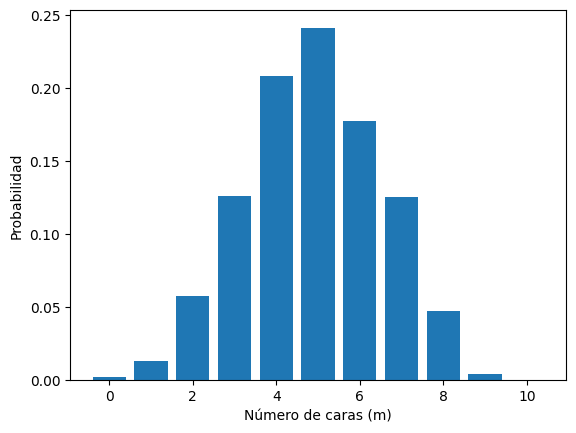

In [12]:
from scipy.stats import binom

n, mu = 10, .5 
m = range(n + 1)
simulaciones = np.random.binomial(n, mu, 1000)
p = [np.mean(simulaciones == num) for num in m]
plt.bar(list(m), p)
plt.xlabel("Número de caras (m)")
plt.ylabel("Probabilidad")
plt.show()

## Distribución Beta

En un enfoque Bayesiano, combinamos un conocimiento previo $prior$ con datos observados (evidencia) para obtener un $posterior$ actualizado.<br>
La función Gamma generaliza el factorial, permitiendo trabajar con cualquier parámetro positivo, no solo enteros.
<div style="padding: 10px">
    $\text{Beta}(\mu \mid a, b) = \frac{\Gamma(a+b)}{\Gamma(a)\Gamma(b)}\,\mu^{a-1}(1-\mu)^{b-1}$
</div>
A parte, asegura que la suma bajo la curva sea 1, y se trate de una distribución de probabilidad.
<div style="padding: 10px">
    $\int_{0}^{1} \mathrm{Beta}(\mu \mid a, b)\, d\mu = 1.$
</div>
Para formar el $posterior$, introducimos dos nuevas variable $m$ (éxitos) y $l$ (fracasos).<br>
Al combinar un prior Beta con la verosimilitud, el posterior vuelve a ser Beta.
<div style="padding: 10px">
    $p(\mu \mid m, l, a, b) = \frac{\Gamma(m + a + l + b)}{\Gamma(m+a)\Gamma(l+b)}\, \mu^{m+a-1}(1-\mu)^{l+b-1}.$
</div>
La probabilidad de que el próximo dato sea 1 es igual a los datos de éxito combinados, entre el total de datos vistos (tal y como se calcula  en la binomial).
<div style="padding: 10px">
    $p(x=1 \mid \mathcal{D}) = \frac{m + a}{m + a + l + b}$
</div>

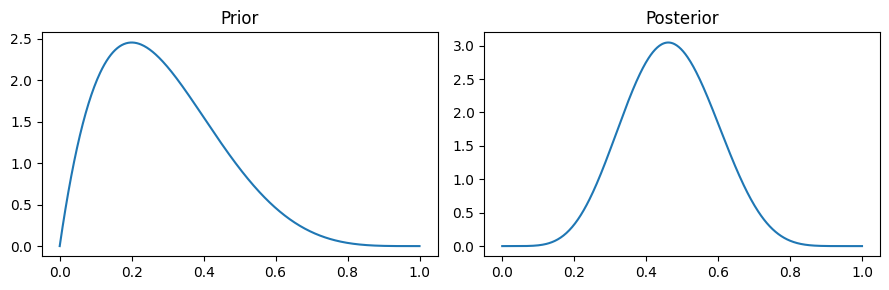

In [26]:
from scipy.stats import beta

a, b = 2, 5
m, l = 5, 3

x = np.linspace(0, 1, 500)
y = beta.pdf(x, a, b)
y_post = beta.pdf(x, a + m, b + l)

plt.figure(figsize=(9,3))
plt.subplot(1, 2, 1)
plt.plot(x, y)
plt.title("Prior")

plt.subplot(1, 2, 2)
plt.plot(x, y_post)
plt.title("Posterior")

plt.tight_layout()
plt.show()

## Variables multinomiales
En una distribución categórica con $K$ posibles variables o estados (por ejemplo, las 6 caras de un dado), una observación puede representarse mediante one-hot encoding, por ejemplo:

<div style="padding: 10px"> 
    $x = (0, 0, 1, 0, 0, 0)^{T}$ 
</div> 
donde el “1” indica el estado observado.

Sea $\boldsymbol{\mu} = (\mu_1, \mu_2, \dots, \mu_K)$ el vector de probabilidades asociado a los $K$ estados, con las condiciones:

<div style="padding: 10px"> 
    $\mu_k \ge 0,\quad \sum_{k=1}^K \mu_k = 1$ 
</div>
Una única observación categórica tiene verosimilitud:

<div style="padding: 10px">
    $p(x \mid \boldsymbol{\mu}) = \prod_{k=1}^{K} \mu_k^{\, x_k}$ 
</div> 
porque sólo un $x_k$ vale 1 y el resto 0.

Dadas $N$ observaciones independientes $x^{(1)}, \dots, x^{(N)}$, definimos:

<div style="padding: 10px"> 
    $m_k = \sum_{n=1}^{N} x_k^{(n)}$ 
</div> 
donde $m_k$ es el número de veces que se observó el estado $k$. La verosimilitud total es:
<div style="padding: 10px">
    $L(\boldsymbol{\mu}) = \prod_{n=1}^N \prod_{k=1}^{K} \mu_k^{\, x_k^{(n)}} = \prod_{k=1}^K \mu_k^{\,m_k}$ 
</div>

El log-likelihood:

<div style="padding: 10px"> 
    $\ell(\boldsymbol{\mu}) = \sum_{k=1}^{K} m_k \log \mu_k$ 
</div>

Maximizamos $\ell(\boldsymbol{\mu})$ sujeto a la restricción $\sum_{k} \mu_k = 1$ mediante un multiplicador de Lagrange:

<div style="padding: 10px"> 
    $\mathcal{L} = \sum_{k=1}^{K} m_k \log \mu_k + \lambda\left( \sum_{k=1}^{K} \mu_k - 1 \right)$ 
</div>
El estimador de máxima verosimilitud es: 
<div style="padding: 10px"> 
    $\mu_{k,\text{ML}} = \frac{m_k}{N}$ 
</div>
La distribución multinomial modela el resultado de repetir $N$ veces un experimento categórico con $K$ posibles resultados, dando así la probabilidad de ver un conjunto $m$<br>
Si $\mathbf{m} = (m_1,\dots,m_K)$ es el vector de conteos, y $\sum_k m_k = N$, la distribución es:

<div style="padding: 10px"> $\text{Mult}(\mathbf{m} \mid N, \boldsymbol{\mu}) = \frac{N!}{m_1!\, m_2! \cdots m_K!} \prod_{k=1}^{K} \mu_k^{\,m_k}$ </div>

El término combinatorio

<div style="padding: 10px"> 
    $\frac{N!}{m_1!\,m_2!\cdots m_K!}$ 
</div> 
cuenta cuántas maneras distintas existen de obtener esa configuración de conteos.

In [119]:
from scipy.stats import multinomial
from scipy.special import factorial
# Ejemplo con los dados
caras = 6
num_tiradas = 20
mu_caras = np.array([.1, .2, .25, .15, .2, .1])
np.random.seed(42)
tiradas = np.random.choice(caras, size=num_tiradas, p=mu_caras)
one_hot = np.eye(caras)[tiradas]
cont_caras = one_hot.sum(axis=0)
max_mu = cont_caras/num_tiradas

print("\n===== DATOS DEL EXPERIMENTO =====")
print(f"Mu real:      {mu_caras}")
print(f"Frecuencias:  {cont_caras.astype(int)}")
print(f"Mu estimada:  {max_mu.round(4)}")

print("\n===== PMF (Scipy) =====")
pmf_real = multinomial.pmf(cont_caras, n=num_tiradas, p=mu_caras)
pmf_est = multinomial.pmf(cont_caras, n=num_tiradas, p=max_mu)

print(f"PMF usando mu real:     {pmf_real:.6e}")
print(f"PMF usando mu estimada: {pmf_est:.6e}")

#Cálculo PMF real desde scratch

print("\n===== PMF (cálculo desde cero) =====")
fact_mx = [factorial(m) for m in cont_caras]
fact_m = np.prod(fact_mx)
norm = factorial(num_tiradas)/fact_m
pmf_real_scratch = norm * np.prod(mu_caras**cont_caras)
print(f"PMF (scratch) usando mu real: {pmf_real_scratch:.6e}")


===== DATOS DEL EXPERIMENTO =====
Mu real:      [0.1  0.2  0.25 0.15 0.2  0.1 ]
Frecuencias:  [2 6 4 2 4 2]
Mu estimada:  [0.1 0.3 0.2 0.1 0.2 0.1]

===== PMF (Scipy) =====
PMF usando mu real:     6.599669e-04
PMF usando mu estimada: 1.368507e-03

===== PMF (cálculo desde cero) =====
PMF (scratch) usando mu real: 6.599669e-04
